In [2]:
import pandas as pd
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import re
from collections import Counter

In [3]:
# Read in data

# second dataset
survey_data = pd.read_csv("../data/library_user_behaviour_survey_responses.csv")
survey_data1= survey_data.copy()

In [4]:
survey_data.columns

Index(['Timestamp',
       'What time do you usually go to Central or Chinese Library? Check all hours that apply.',
       'From which level do you usually enter Central/Chinese Library?',
       'Why do you visit the library?', 'What is your year of study?',
       'Overall, how much time do you spend in the library in a day outside of exam period?',
       'Overall, how much time do you spend in the library in a day during exam period (including Reading Week)?',
       'Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [Level 3]',
       'Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [Level 4]',
       'Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [Level 5]',
       'Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to le

Seat Preference Analysis

In [5]:
column_positions = list(range(18,81,7))

# Select the columns by their positions
df = survey_data.iloc[:, column_positions]
df = df.dropna()
#df.columns = df.columns.str.extract(r'(.*)\s*\(Level\s([\d\s&]+).*')
df.columns = df.columns.str.extract(r'(.*)\s*\(Level.*')[0]

new_df = pd.DataFrame()

# Convert each row to a dictionary
row_dicts = df.to_dict(orient='records')

# Print the list of dictionaries
cleaned_dicts = [{key.strip(): value for key, value in d.items()} for d in row_dicts]

new_df["seat_pref_dict"] = cleaned_dicts

final_df = pd.DataFrame()

final_df["seat_pref_dict"] = new_df["seat_pref_dict"].value_counts().index
final_df["count"] = new_df["seat_pref_dict"].value_counts().to_list()

#final_df.to_csv('/Users/yunethirikhin/School/Y3S1/DSA3101/Project/data/seat_pref.csv', index=False)
final_df

,seat_pref_dict,count
0,"{'Discussion Cubicles': 4.0, 'Windowed Seats':...",5
1,"{'Discussion Cubicles': 3.0, 'Windowed Seats':...",5
2,"{'Discussion Cubicles': 5.0, 'Windowed Seats':...",3
3,"{'Discussion Cubicles': 2.0, 'Windowed Seats':...",1
4,"{'Discussion Cubicles': 3.0, 'Windowed Seats':...",1
...,...,...
170,"{'Discussion Cubicles': 5.0, 'Windowed Seats':...",1
171,"{'Discussion Cubicles': 4.0, 'Windowed Seats':...",1
172,"{'Discussion Cubicles': 3.0, 'Windowed Seats':...",1
173,"{'Discussion Cubicles': 2.0, 'Windowed Seats':...",1


In [6]:
column_positions = list(range(18,81,7))

# Select the columns by their positions
df = survey_data.iloc[:, column_positions]
df = df.dropna()
df = df.mean()
df = pd.DataFrame(df)
location_level_df = df.index.str.extract(r'(.*)\s*\((Level [\d\s&]+).*')

df.reset_index(drop=True, inplace=True)

df = pd.concat([location_level_df, df], ignore_index = True, axis=1)
df.columns = ['Seat', 'Level', 'Average Preference']
df

,Seat,Level,Average Preference
0,Discussion Cubicles,Level 3,3.345946
1,Windowed Seats,Level 5&6,3.313514
2,Diagonal Seats,Level 6,3.145946
3,Cubicle seats,Level 6,3.621622
4,4-man tables,Level 5,3.086486
5,8-man tables,Level 5,2.708108
6,Soft seats,Level 3 & 4,3.140541
7,Sofa,Level 3 & 4,2.837838
8,Moveable seats,Level 3,2.654054


In [7]:
seat_pref_dict = {'Discussion Cubicles': 5.0, 'Windowed Seats': 1.0, 'Diagonal Seats': 5.0, 'Cubicle seats': 4.0, '4-man tables': 1.0, '8-man tables': 1.0, 'Soft seats': 3.0, 'Sofa': 3.0, 'Moveable seats': 2.0}

# Sort the dictionary by values in descending order
sorted_seat_pref = dict(sorted(seat_pref_dict.items(), key=lambda item: item[1], reverse=True))

# Print or use the sorted_seat_pref dictionary as needed
print(sorted_seat_pref.values())
print(type(seat_pref_dict))

dict_values([5.0, 5.0, 4.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0])
<class 'dict'>


# Ideas

1) Link Usual Time of Arrival to Preferred Floors and Sections 

2) Smth with Usual Lunch Time

3) Choping 

In [8]:
# Data Cleaning 

# Rename columns
survey_data.rename(
    columns={'What time do you usually go to Central or Chinese Library? Check all hours that apply.': 'Usual Time of Arrival',
             'From which level do you usually enter Central/Chinese Library?': 'Usual Gantry',
             'Why do you visit the library?': 'Reason for Visit',
            'What is your year of study?': 'Year of Study',
            'Overall, how much time do you spend in the library in a day outside of exam period?':'Time spent in library (Non-Exam Period)',
            'Overall, how much time do you spend in the library in a day during exam period (including Reading Week)?': 'Time spent in library (Exam Period)',
            'Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [Level 3]' : 'Level 3 Preference',
             'Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [Level 4]' : 'Level 4 Preference',
             'Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [Level 5]' : 'Level 5 Preference',
             'Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [L6-Central Library]' : 'Level 6 CLB Preference',
             'Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [L6-Chinese Library]' : 'Level 6 Chinese Lib Preference',
             'To what extent are the following environmental qualities important to you? [Privacy]' : 'Importance of Privacy',
             'To what extent are the following environmental qualities important to you? [Crowd level]' : 'Importance of Crowd level',
             'To what extent are the following environmental qualities important to you? [Comfort]' : 'Importance of Comfort',
             'To what extent are the following environmental qualities important to you? [Scenery]' : 'Importance of Scenery',
             'To what extent are the following environmental qualities important to you? [Lighting]' : 'Importance of Lighting',
             'To what extent are the following environmental qualities important to you? [Ease of finding seats]' : 'Importance of Ease of Finding Seats',
             'If your preferred seating option is not available, would you choose other type of seats?' : 'Choose other seats when preferred seat not avail?',
             'In your experience, which level in Central/Chinese Library is the most crowded?' : 'Most Crowded Level',
             'What time do you usually go for lunch?': 'Usual Lunch Time',
             'Do you usually study alone or as a group? Indicate your group size below.': 'Solo or Group Study',
             'If you previous answer is 1 pax, in the event where there are no more available seats, would you rather share a table (level 3 & 4 small tables)  with a stranger or look for a seat outside the library?': 'Likelihood to share seats when solo',
             'To what extent will you leave your belongings in the library to chope seats?': 'Likelihood to chope seats',
             'For what reasons do you think people can chope seats?': 'Reasons for choping seats'
            }, inplace=True)


In [9]:
column_positions = [1, 2, 4] + list(range(5, 12)) + [81,82, 83, 84, 85, 87]

# Select the columns by their positions
df = survey_data1.iloc[:, column_positions]

In [10]:
df

,What time do you usually go to Central or Chinese Library? Check all hours that apply.,From which level do you usually enter Central/Chinese Library?,What is your year of study?,"Overall, how much time do you spend in the library in a day outside of exam period?","Overall, how much time do you spend in the library in a day during exam period (including Reading Week)?",Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [Level 3],Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [Level 4],Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [Level 5],Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [L6-Central Library],Rate from 1 to 5 how much you prefer each level in the library.\nIt is fine to leave blank if you have never been to the area. [L6-Chinese Library],"If your preferred seating option is not available, would you choose other type of seats?","In your experience, which level in Central/Chinese Library is the most crowded?",What time do you usually go for lunch?,Do you usually study alone or as a group? Indicate your group size below.,"If you previous answer is 1 pax, in the event where there are no more available seats, would you rather share a table (level 3 & 4 small tables) with a stranger or look for a seat outside the library?",To what extent will you leave your belongings in the library to chope seats?
0,"11am, 2pm","Level 1, Level 4",Year 3,4 hrs,6 hrs,2,NaN,NaN,NaN,NaN,Yes,Level 6,12-1pm,2-3 pax,NaN,Leave my belongings and go for lessons. (1hr-2hr)
1,1pm,Level 4,Year 3,4 hrs,Less than 2hrs,2,NaN,NaN,NaN,NaN,Yes,Level 4,12-1pm,1 pax,No,Leave my belongings and go for lunch. (30min-1hr)
2,10am,Level 4,Year 3,Up to 1 hour,Up to 1 hour,2,3,1 - Least preferred,1 - Least preferred,1 - Least preferred,Yes,Level 4,11-12pm,Alone,Maybe,I take my belongings everytime I leave
3,"2pm, 3pm, 6pm","Level 1, Level 4",Year 3,Up to 2 hours,Up to 4 hours,3,2,5 - Most preferred,4,4,Yes,L6 – Central Library,12-1pm,Alone,Share a table with a stranger,Leave my belongings and go for lunch. (30min-1hr)
4,11am,Level 4,Year 2,Up to 6 hours,Up to 1 hour,4,4,4,4,2,Yes,Level 5,11-12pm,2-3 pax,NaN,Leave my belongings and go for lunch. (30min-1hr)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,4pm,Level 1,Year 3,Up to 2 hours,More than 6 hours,2,5 - Most preferred,3,4,1 - Least preferred,Yes,L6 – Central Library,12-1pm,2-3 pax,Share a table with a stranger,Leave my belongings and go for lunch. (30min-1hr)
249,"9am, 10am, 11am, 2pm, 3pm","Level 1, Level 4",Year 3,Up to 4 hours,More than 6 hours,2,3,4,4,1 - Least preferred,Yes,L6 – Central Library,12-1pm,Alone,Look for a seat outside the library,Leave my belongings and go for lunch. (30min-1hr)
250,12pm,Level 6(Chinese Library),Masters,Up to 2 hours,Up to 4 hours,3,3,3,1 - Least preferred,1 - Least preferred,Yes,L6 – Central Library,11-12pm,Alone,Share a table with a stranger,Leave my belongings and go for lunch. (30min-1hr)
251,"10am, 11am, 12pm, 1pm, 2pm, 3pm, 4pm, 5pm, 6pm","Level 1, Level 4",Year 1,Up to 4 hours,Up to 6 hours,4,5 - Most preferred,3,NaN,NaN,Yes,Level 3,12-1pm,2-3 pax,Share a table with a stranger,Leave my belongings and go for lunch. (30min-1hr)


In [11]:
df['Hours spent during non-exam period'] = df['Overall, how much time do you spend in the library in a day outside of exam period?'].apply(lambda x: [int(s) for s in re.findall(r'\d+', str(x))][0] if re.findall(r'\d+', str(x)) else None)

/var/folders/xg/6gfgznfs7t72wqwz71mlhlb00000gn/T/ipykernel_62813/3865230094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hours spent during non-exam period'] = df['Overall, how much time do you spend in the library in a day outside of exam period?'].apply(lambda x: [int(s) for s in re.findall(r'\d+', str(x))][0] if re.findall(r'\d+', str(x)) else None)


In [12]:
df['Hours spent during exam season'] = df['Overall, how much time do you spend in the library in a day during exam period (including Reading Week)?'].apply(lambda x: [int(s) for s in re.findall(r'\d+', str(x))][0] if re.findall(r'\d+', str(x)) else None)

/var/folders/xg/6gfgznfs7t72wqwz71mlhlb00000gn/T/ipykernel_62813/1655765261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hours spent during exam season'] = df['Overall, how much time do you spend in the library in a day during exam period (including Reading Week)?'].apply(lambda x: [int(s) for s in re.findall(r'\d+', str(x))][0] if re.findall(r'\d+', str(x)) else None)


# # Analysis of hours spent at the library

0.0     1
1.0    43
2.0    49
4.0    92
6.0    63
Name: Hours spent during non-exam period, dtype: int64
Mean Hours Spent: 3.5766129032258065
Median Hours Spent: 4.0
Standard deviation of Hours Spent: 1.8070312007490652


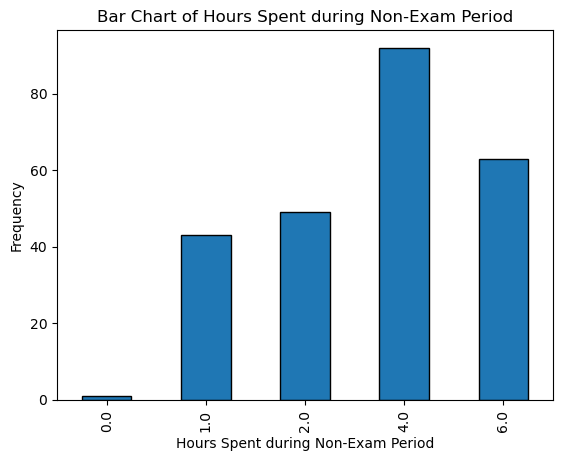

In [13]:
# Extract the data from the DataFrame
hours_data = df['Hours spent during non-exam period']

# Count the frequency of each value
value_counts = hours_data.value_counts().sort_index()
print(value_counts)

# Create a bar chart
value_counts.plot(kind='bar', edgecolor='k')
plt.xlabel('Hours Spent during Non-Exam Period')
plt.ylabel('Frequency')
plt.title('Bar Chart of Hours Spent during Non-Exam Period')

# Calculate mean, median, and standard deviation
mean_hours = hours_data.mean()
median_hours = hours_data.median()
std_hours = hours_data.std()

# Print the summary
print("Mean Hours Spent:", mean_hours)
print("Median Hours Spent:", median_hours)
print("Standard deviation of Hours Spent:", std_hours)

# Show the bar chart
plt.show()

0.0       2
1.0      23
2.0      22
4.0      50
6.0     145
10.0      1
Name: Hours spent during exam season, dtype: int64
Mean Hours Spent during Exam Season: 4.720164609053498
Median Hours Spent during Exam Season: 6.0
Standard Deviation of Hours Spent during Exam Season: 1.8373660556292735


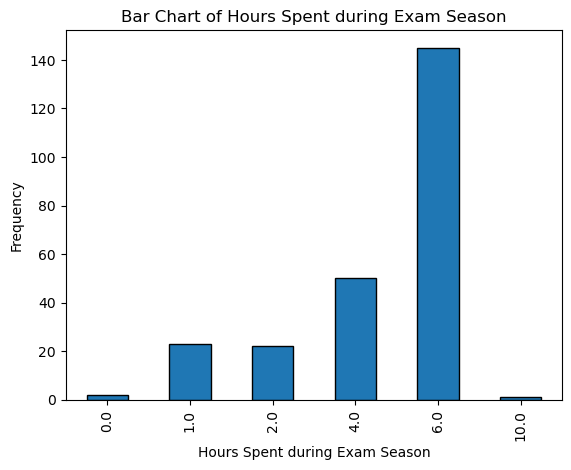

In [14]:
# Extract the data from the DataFrame
hours_data_exam = df['Hours spent during exam season']

# Count the frequency of each value
value_counts = hours_data_exam.value_counts().sort_index()
print(value_counts)

# Create a bar chart
value_counts.plot(kind='bar', edgecolor='k')
plt.xlabel('Hours Spent during Exam Season')
plt.ylabel('Frequency')
plt.title('Bar Chart of Hours Spent during Exam Season')

# Calculate mean, median, and standard deviation
mean_hours_exam = hours_data_exam.mean()
median_hours_exam = hours_data_exam.median()
std_deviation_hours_exam = hours_data_exam.std()

# Print the summary
print("Mean Hours Spent during Exam Season:", mean_hours_exam)
print("Median Hours Spent during Exam Season:", median_hours_exam)
print("Standard Deviation of Hours Spent during Exam Season:", std_deviation_hours_exam)

# Show the bar chart
plt.show()


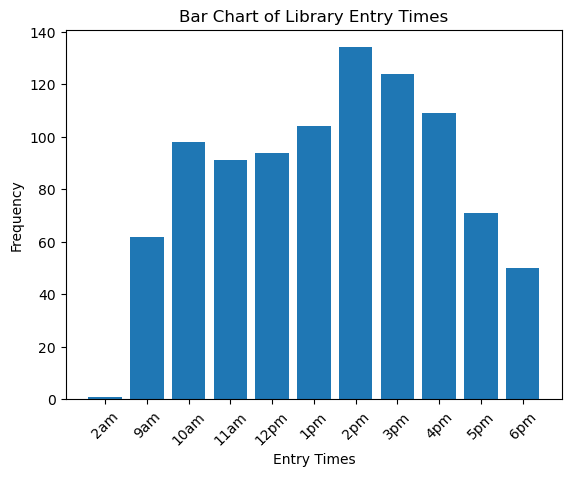

In [15]:
# Function to extract times from the string
def extract_times(entry_str):
    times = re.findall(r'\d{1,2}am|\d{1,2}pm', entry_str)
    return times

# Apply the function to extract times and create a list of all times
all_entry_times = []
for entry_str in df['What time do you usually go to Central or Chinese Library? Check all hours that apply.']:
    entry_times = extract_times(entry_str)
    all_entry_times.extend(entry_times)

# Count the frequency of each entry time
time_counts = dict(Counter(all_entry_times))

# Custom sorting function to ensure "12pm" appears before "1pm"
def custom_sort(time_str):
    if time_str == '12pm':
        return 11.5  # Place "12pm" just before "1pm"
    if time_str.endswith('pm'):
        return int(time_str[:-2]) + 12
    return int(time_str[:-2])


# Sort the times for plotting
sorted_times = sorted(time_counts.keys(), key=custom_sort)

# Get the corresponding counts in the sorted order
counts = [time_counts[time] for time in sorted_times]

# Create a bar chart
plt.bar(sorted_times, counts)
plt.xlabel('Entry Times')
plt.ylabel('Frequency')
plt.title('Bar Chart of Library Entry Times')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the bar chart
plt.show()

2-3 pax
1 pax
Alone
4-6 pax
7 +


/var/folders/xg/6gfgznfs7t72wqwz71mlhlb00000gn/T/ipykernel_62813/803515680.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Do you usually study alone or as a group? Indicate your group size below.'] = df['Do you usually study alone or as a group? Indicate your group size below.'].replace('Alone', '1 pax')


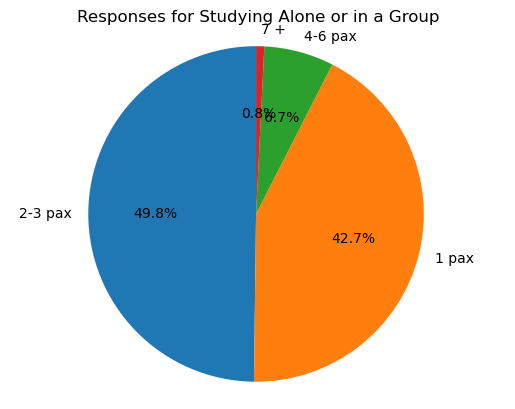

In [16]:
# Extract distinct responses from the column
distinct_responses = df['Do you usually study alone or as a group? Indicate your group size below.'].unique()

# Print the distinct responses
for response in distinct_responses:
    print(response)
    
# Replace "Alone" with "1 pax" in the specified column
df['Do you usually study alone or as a group? Indicate your group size below.'] = df['Do you usually study alone or as a group? Indicate your group size below.'].replace('Alone', '1 pax')

# Count the frequency of each response
response_counts = df['Do you usually study alone or as a group? Indicate your group size below.'].value_counts()

# Create a pie chart
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Responses for Studying Alone or in a Group')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

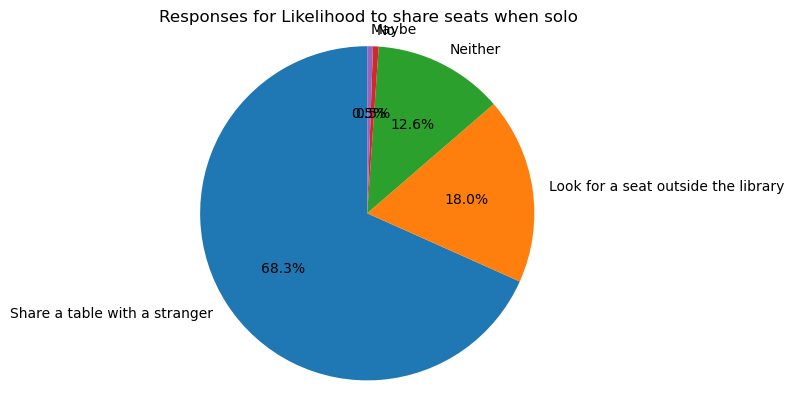

Capacity: 0.8415


In [17]:
distinct_responses = survey_data['Likelihood to share seats when solo'].unique()

category_counts = survey_data['Likelihood to share seats when solo'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Responses for Likelihood to share seats when solo')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

# just consider as 68.3% willing to share -> 1.0 capacity
# 31.7% not willing to share seats -> 0.5 capacity

# Given percentages
percentage_willing_to_share = 0.683
percentage_not_willing_to_share = 0.317

# Calculate capacity
capacity = (percentage_willing_to_share * 1.0) + (percentage_not_willing_to_share * 0.5)

# Print the capacity
print("Capacity:", capacity)

# Seat choping analysis

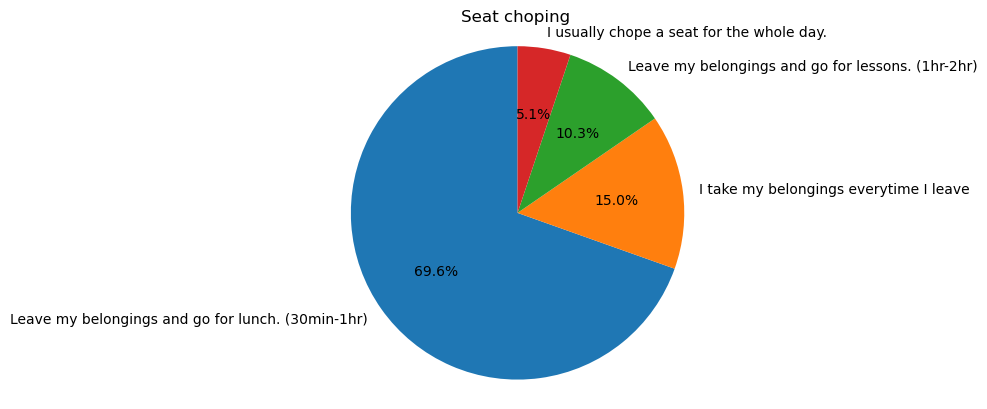

Leave my belongings and go for lunch. (30min-1hr)    176
I take my belongings everytime I leave                38
Leave my belongings and go for lessons. (1hr-2hr)     26
I usually chope a seat for the whole day.             13
Name: To what extent will you leave your belongings in the library to chope seats?, dtype: int64


In [18]:
# Count the frequency of each response
response_counts = df['To what extent will you leave your belongings in the library to chope seats?'].value_counts()

# Create a pie chart
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Seat choping ')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

print(response_counts)

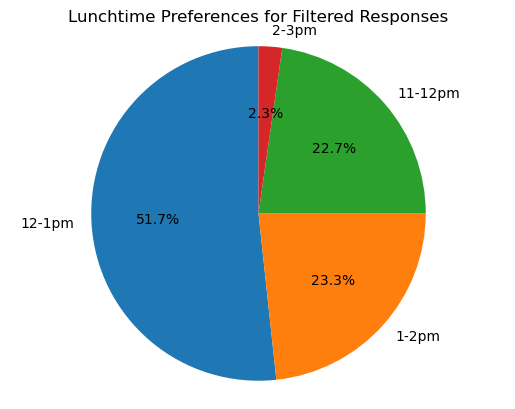

12-1pm     91
1-2pm      41
11-12pm    40
2-3pm       4
Name: What time do you usually go for lunch?, dtype: int64


In [20]:
# Filter for users who go for lunch and chope seats
filtered_rows = df[df['To what extent will you leave your belongings in the library to chope seats?'] == 'Leave my belongings and go for lunch. (30min-1hr)']

lunchtime_counts = filtered_rows['What time do you usually go for lunch?'].value_counts()

# Create a pie chart
plt.pie(lunchtime_counts, labels=lunchtime_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Lunchtime Preferences for Filtered Responses')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

print(lunchtime_counts)

69% of library users are likely to chope seats while going for lunch, and take on average 45 minutes. This means that from 11pm to 2pm, the library is likely to suffer from seat hogging and is not operating at its most efficient capacity. Out of these users, 51.7% of them goes for lunch during 12-1pm, which means the seat hogging situation is the worst around 12.30pm